# Bird Strikes in Aviation: Aircraft Collisions

The dataset is provided by the FAA and covers incidents from 2000 to 2011. It offers a comprehensive overview of bird strikes in the U.S. This dataset offers valuable insights into bird strike patterns, focusing on factors such as aircraft type, location, flight phase, and the specific species involved. By analyzing these variables, it helps identify risk factors and trends, supporting the development of strategies to reduce the frequency and impact of bird strikes, ultimately enhancing aviation safety and risk mitigation.

Link to dataset: https://www.kaggle.com/datasets/iamtapendu/bird-strike-by-aircafts-data

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
# Load the data
df = pd.read_csv('bird_strikes.csv')

# Basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25429 entries, 0 to 25428
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   RecordID                  25429 non-null  int64 
 1   AircraftType              25429 non-null  object
 2   AirportName               25429 non-null  object
 3   AltitudeBin               25429 non-null  object
 4   MakeModel                 25429 non-null  object
 5   NumberStruck              25429 non-null  object
 6   NumberStruckActual        25429 non-null  int64 
 7   Effect                    2078 non-null   object
 8   FlightDate                25429 non-null  object
 9   Damage                    25429 non-null  object
 10  Engines                   25195 non-null  object
 11  Operator                  25429 non-null  object
 12  OriginState               24980 non-null  object
 13  FlightPhase               25429 non-null  object
 14  ConditionsPrecipitatio

### Strikes by Number Per Year

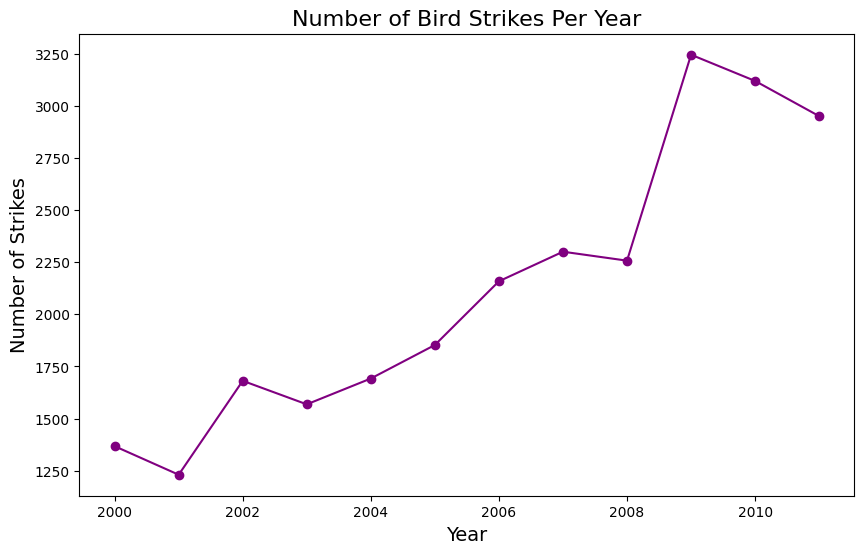

In [24]:
# Convert the 'FlightDate' column to datetime format
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

# Extract the year from the 'FlightDate' column
df['Year'] = df['FlightDate'].dt.year

# Count the number of strikes per year
strikes_per_year = df['Year'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(strikes_per_year.index, strikes_per_year.values, marker='o', linestyle='-', color='purple')
plt.title('Number of Bird Strikes Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Strikes', fontsize=14)

# Show the graph
plt.show()

### Top 10 Number of Strikes per Airport

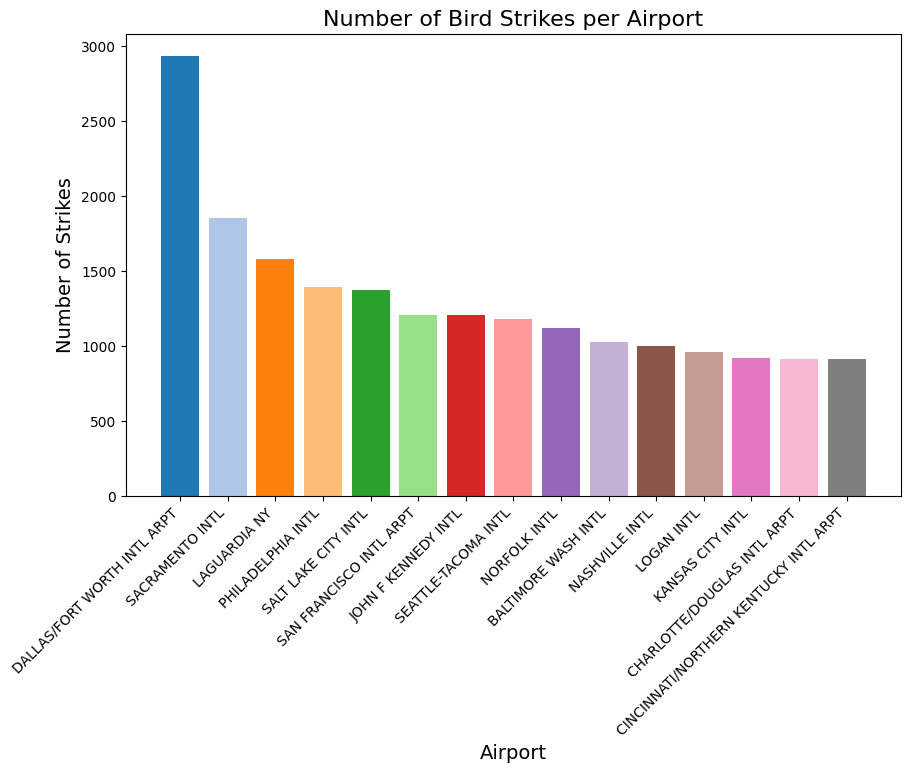

In [56]:
# Group by 'AirportName' and sum up the 'NumberStruckActual' column
strikes_per_airport = df.groupby('AirportName')['NumberStruckActual'].sum()

# Sort by number of strikes in descending order and choose the top 15
strikes_per_airport = strikes_per_airport.sort_values(ascending=False).head(15)

# Generate a unique color for each bar
colors = cm.tab20(range(len(strikes_per_airport)))

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(strikes_per_airport.index, strikes_per_airport.values, color=colors)
plt.title('Number of Bird Strikes per Airport', fontsize=16)
plt.xlabel('Airport', fontsize=14)
plt.ylabel('Number of Strikes', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the graph
plt.show()

### Max Number of Birds Struck

In [60]:
# Calculate the maximum number of birds struck
max_birds_struck = df['NumberStruckActual'].max()

print(f"The largest number of birds struck in a single incident is: {max_birds_struck} birds")

The largest number of birds struck in a single incident is: 942 birds


### Strikes by Bird Type

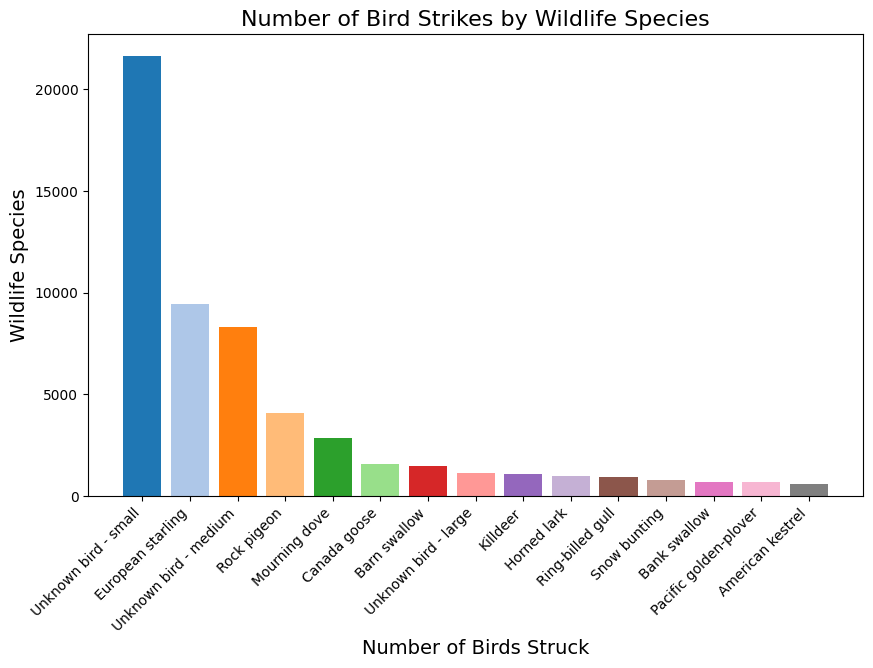

In [55]:
# Group by 'WildlifeSpecies' and sum up the 'NumberStruckActual' column
strikes_by_species = df.groupby('WildlifeSpecies')['NumberStruckActual'].sum()

# Sort by the number of strikes in descending order and select top 15 species
strikes_by_species = strikes_by_species.sort_values(ascending=False).head(15)

# Generate a unique color for each bar
colors = cm.tab20(range(len(strikes_by_species)))

# Plot the data as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.bar(strikes_by_species.index, strikes_by_species.values, color= colors)
plt.title('Number of Bird Strikes by Wildlife Species', fontsize=16)
plt.xlabel('Number of Birds Struck', fontsize=14)
plt.ylabel('Wildlife Species', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Show the graph
plt.show()

### Airline with Most Bird Strikes

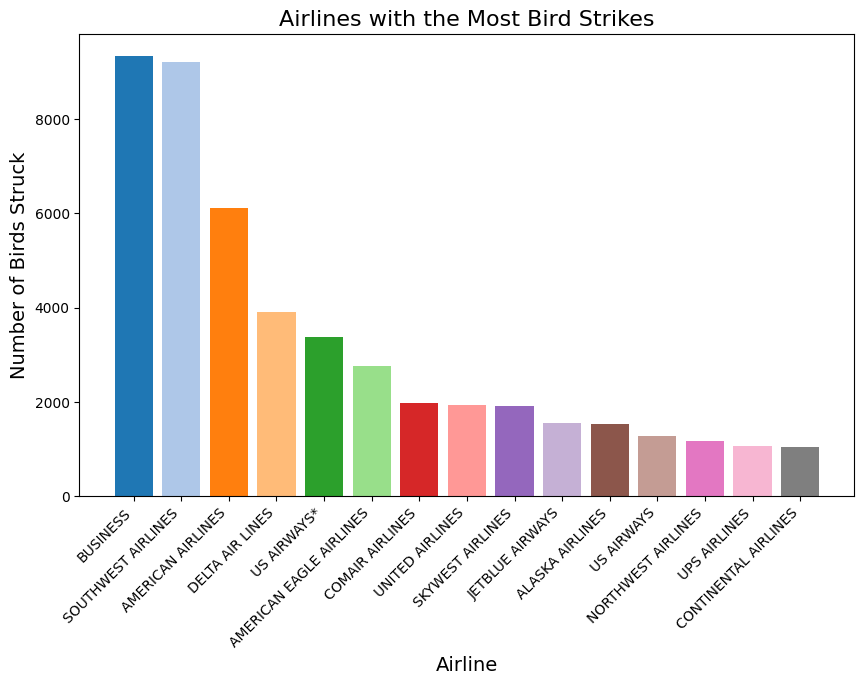

In [65]:
# Group by 'Operator' and sum up the 'NumberStruckActual' column
strikes_by_airline = df.groupby('Operator')['NumberStruckActual'].sum()

# Sort by the number of strikes in descending order and select the top 10 airlines
strikes_by_airline = strikes_by_airline.sort_values(ascending=False).head(15)

# Generate a unique color for each bar
colors = cm.tab20(range(len(strikes_by_species)))

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(strikes_by_airline.index, strikes_by_airline.values, color= colors)
plt.title('Airlines with the Most Bird Strikes', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Birds Struck', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the graph
plt.show()

### Precipitation Conditions during Strike

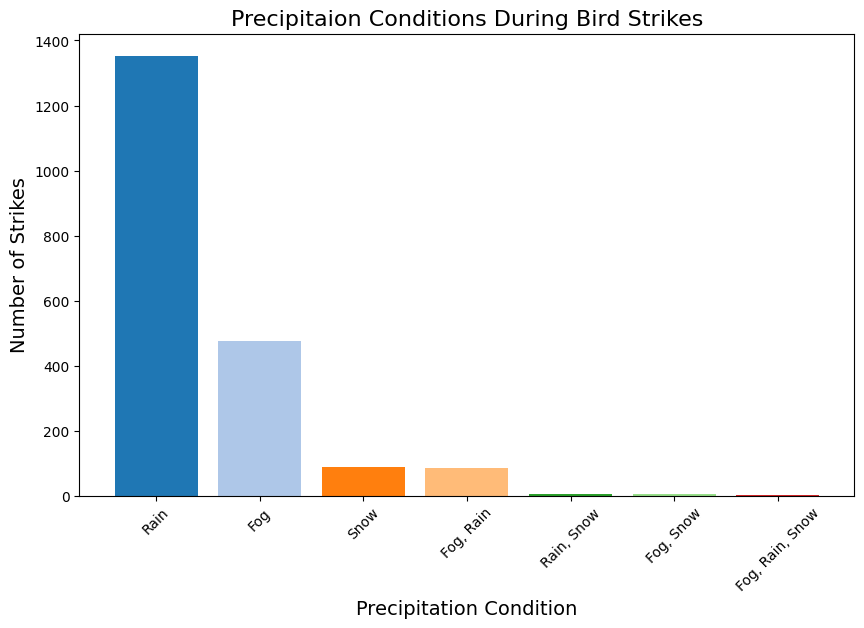

In [67]:
# Count the occurrences of each unique sky condition
precipitation_conditions = df['ConditionsPrecipitation'].value_counts()

# Generate a unique color for each bar
colors = cm.tab20(range(len(precipitation_conditions)))

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(precipitation_conditions.index, precipitation_conditions.values, color=colors)
plt.title('Precipitaion Conditions During Bird Strikes', fontsize=16)
plt.xlabel('Precipitation Condition', fontsize=14)
plt.ylabel('Number of Strikes', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the graph
plt.show()